In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('index.csv',parse_dates=['datetime'])

In [20]:
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


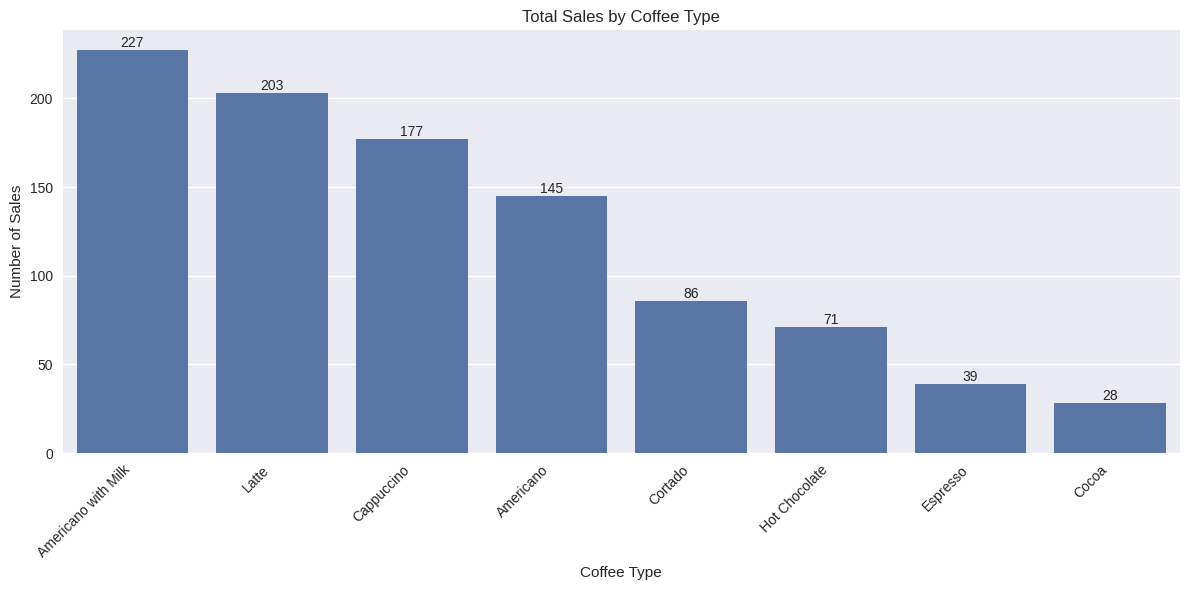

In [21]:
# 1. Total sales by coffee type
plt.figure(figsize=(12, 6))
coffee_counts = df['coffee_name'].value_counts()
sns.barplot(x=coffee_counts.index, y=coffee_counts.values)
plt.title('Total Sales by Coffee Type')
plt.xlabel('Coffee Type')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(coffee_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [22]:
print("Top 5 selling coffee types:")
print(coffee_counts.head())


Top 5 selling coffee types:
coffee_name
Americano with Milk    227
Latte                  203
Cappuccino             177
Americano              145
Cortado                 86
Name: count, dtype: int64


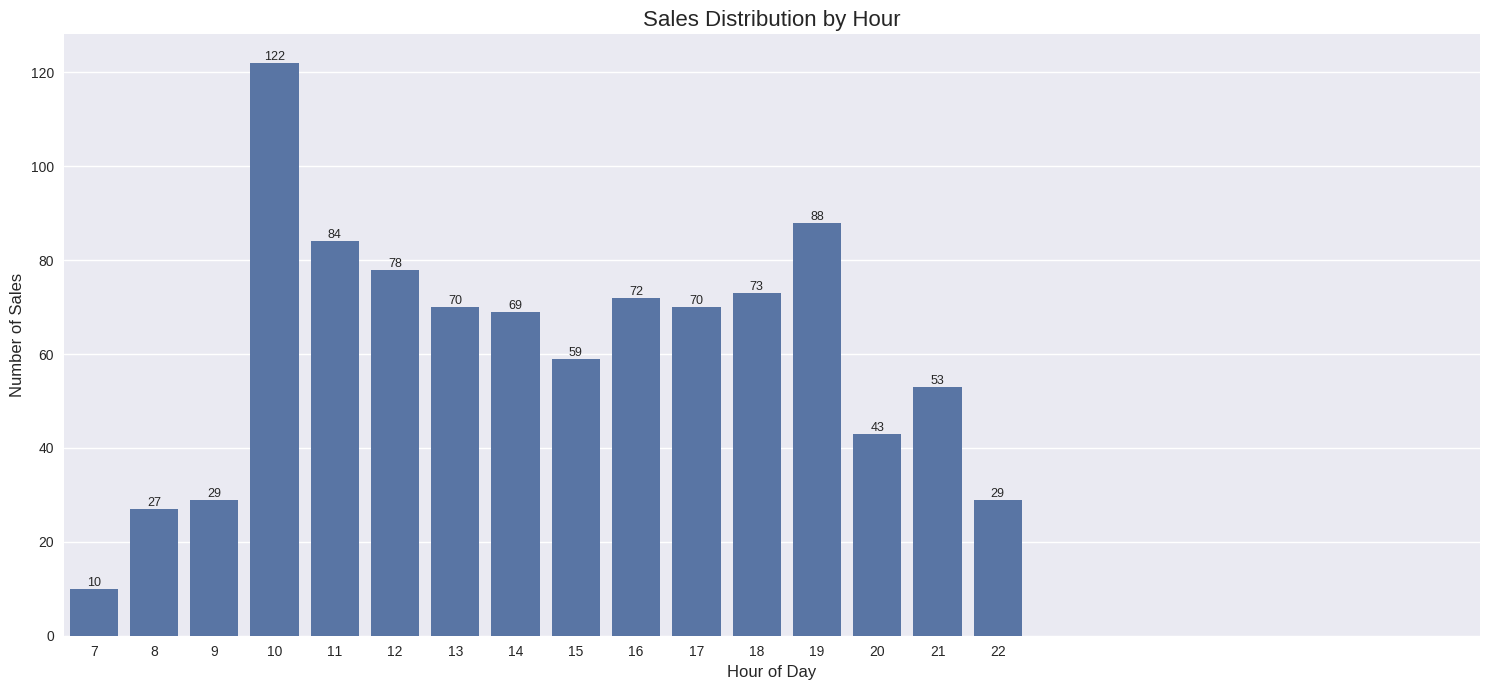

In [23]:
df['hour'] = df['datetime'].dt.hour
hourly_sales = df.groupby('hour').size()

plt.figure(figsize=(15, 7))
ax = sns.barplot(x=hourly_sales.index, y=hourly_sales.values)
plt.title('Sales Distribution by Hour', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.xticks(range(0, 24), fontsize=10)
plt.yticks(fontsize=10)

# Add numbers to the columns
for i, v in enumerate(hourly_sales.values):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [24]:
print("\nBusiest hours:")
print(hourly_sales.nlargest(3))

print("\nQuietest hours:")
print(hourly_sales.nsmallest(3))


Busiest hours:
hour
10    122
19     88
11     84
dtype: int64

Quietest hours:
hour
7    10
8    27
9    29
dtype: int64


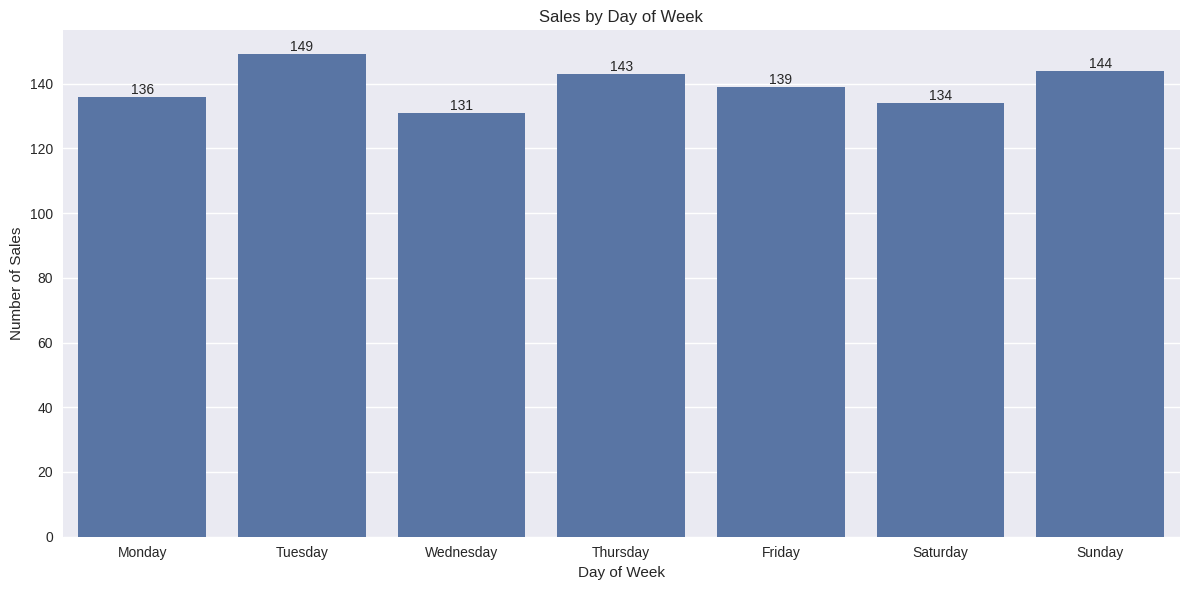

In [25]:
# 3. Sales by day of week
df['day_of_week'] = df['datetime'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_sales = df['day_of_week'].value_counts().reindex(day_order)
plt.figure(figsize=(12, 6))
sns.barplot(x=weekly_sales.index, y=weekly_sales.values)
plt.title('Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Sales')
for i, v in enumerate(weekly_sales.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()

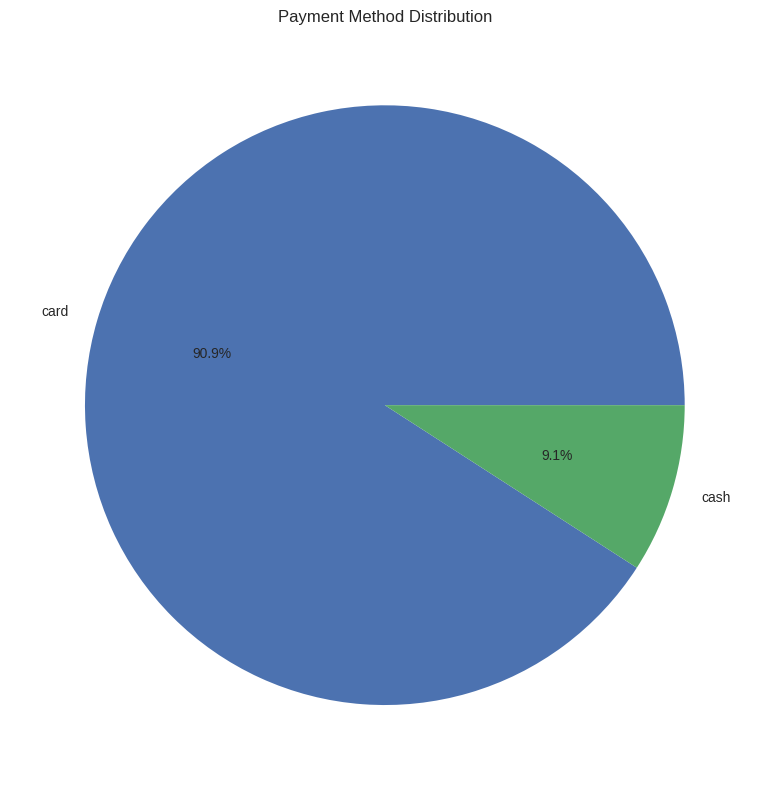

In [26]:
# 4. Payment method distribution
payment_dist = df['cash_type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(payment_dist.values, labels=payment_dist.index, autopct='%1.1f%%')
plt.title('Payment Method Distribution')
plt.tight_layout()
plt.show()

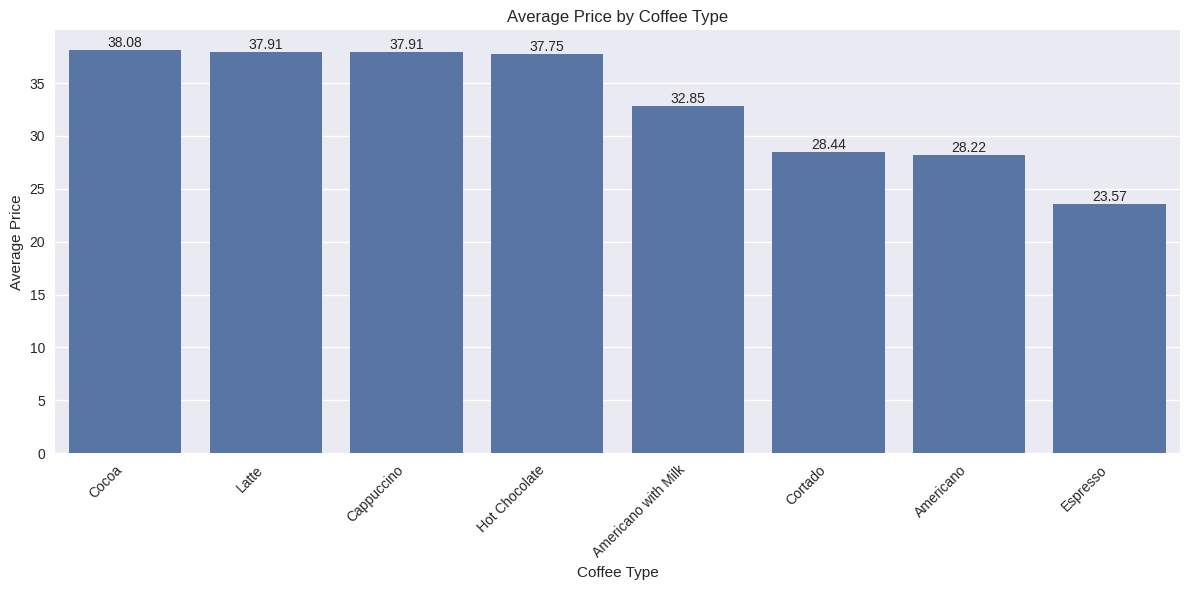

In [28]:
# 5. Average price by coffee type
average_prices = df.groupby('coffee_name')['money'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=average_prices.index, y=average_prices.values)
plt.title('Average Price by Coffee Type')
plt.xlabel('Coffee Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(average_prices.values):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()